In [420]:
from PIL import Image
import numpy as np
from algorithme.admmp2 import ADMMP2

In [421]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [422]:
x = np.array(Image.open('../image/cameraman.tif').convert('L'))
xref = x
h = 1/16 * np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])

h = np.ones((15,15))
h = h / np.linalg.norm(h)**2

In [423]:
x_max = np.max(x/255.)
lambd = 2e-17
mu = 2e-4
nu_min = 4.3
nu = 2**8 * lambd * nu_min/(mu*x_max)
nu=0.1

In [424]:
algo = ADMMP2(x/255., h, lambd=lambd, mu=mu, nu=nu)

In [425]:
y = algo.gaussian_filter_2d()

In [426]:
X_, iter,tabError,tabTime, tabBSNR, tabLagran = algo.fit_transform(y, eps=10e-9, stop=40)

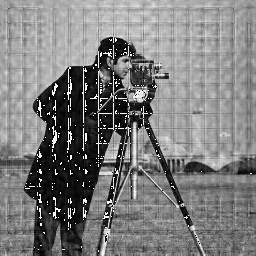

In [427]:
Image.fromarray(np.uint8(X_*255))

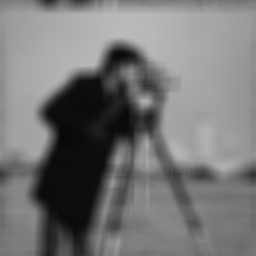

In [428]:
Image.fromarray(np.uint8(algo.rfft_dot(X_, algo.A_fft)*255))

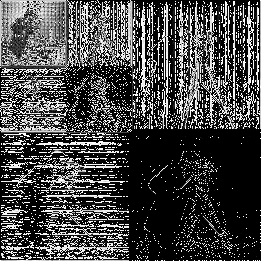

In [429]:
Image.fromarray(np.uint8(algo.wavelet_transform(X_)[0]*255))

In [430]:
algo.plot_convergence_iter(tabLagran, np.arange(0, iter+1, 1), "Evolution du Lagrangien <br><sup>Algorithme ADMMP2 </sup>", 'iter', "L")

In [431]:
algo.plot_convergence_iter(20*np.log10(tabError), np.arange(0, iter+1, 1), "Evolution de l'erreur <br><sup>Algorithme ADMMP2 </sup>", 'iter', r'$20log_{10}(||x-x_{\inf}||/||x_{\inf}||)$')